In [4]:
import numpy as np
np.random.seed(140)
n = 100
X1 = np.random.uniform(0, 1, n)
U = np.random.uniform(0, 1, n)
X2 = 0.5 * X1 + 10 * U
E = np.random.normal(0, 1, n)
Y = 2 * X1 + 0.3 * X2 + E

In [10]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = np.column_stack((X1, X2))  # Combine X1 and X2 into a single matrix

# Fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the coefficient estimates
w0 = model.intercept_  # Intercept
w1, w2 = model.coef_   # Coefficients for X1 and X2

print("Coefficient estimates:")
print("w0 (intercept):", w0)
print("w1 (X1):", w1)
print("w2 (X2):", w2)

Coefficient estimates:
w0 (intercept): 0.13364121930147554
w1 (X1): 2.4054835221235984
w2 (X2): 0.2590820690368751


In [12]:
import numpy as np
from scipy.stats import t

# Predicted values and residuals
y_pred = model.predict(X)
residuals = Y - y_pred

# Degrees of freedom
n, p = X.shape  # n = number of samples, p = number of predictors
df = n - p - 1  # Degrees of freedom

# Variance of residuals
residual_variance = np.sum(residuals**2) / df

# Variance-covariance matrix of coefficients
X_with_intercept = np.column_stack((np.ones(n), X))  # Add intercept column
XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
coef_variance = residual_variance * np.diag(XtX_inv)

# Standard errors of coefficients
se = np.sqrt(coef_variance)

# t-statistics for coefficients
t_stats = model.coef_ / se[1:]  # Exclude intercept's SE

# p-values for coefficients
p_values = [2 * (1 - t.cdf(np.abs(t_stat), df)) for t_stat in t_stats]

# Print results
print("t-statistics:", t_stats)
print("p-values:", p_values)

# Check significance at 5% level
alpha = 0.05
print("\nSignificance tests:")
print(f"H0: w1 = 0 -> {'Reject' if p_values[0] < alpha else 'Fail to reject'}")
print(f"H0: w2 = 0 -> {'Reject' if p_values[1] < alpha else 'Fail to reject'}")

t-statistics: [8.02260516 8.68264223]
p-values: [2.4025226252888388e-12, 9.325873406851315e-14]

Significance tests:
H0: w1 = 0 -> Reject
H0: w2 = 0 -> Reject


In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Parameters
n = 100  # Number of samples
num_datasets = 1000  # Number of datasets
w1_estimates = []  # Store w1 estimates
w2_estimates = []  # Store w2 estimates

# Loop to generate datasets and fit models
for seed in range(num_datasets):
    np.random.seed(seed *2)
    X1 = np.random.uniform(0, 1, n)
    U = np.random.uniform(0, 1, n)
    X2 = 0.5 * X1 + 10 * U
    E = np.random.normal(0, 1, n)
    Y = 2 * X1 + 0.3 * X2 + E

    # Prepare the data
    X = np.column_stack((X1, X2))
    model = LinearRegression()
    model.fit(X, Y)

    # Store the coefficient estimates
    w1, w2 = model.coef_
    w1_estimates.append(w1)
    w2_estimates.append(w2)

# Convert to numpy arrays for analysis
w1_estimates = np.array(w1_estimates)
w2_estimates = np.array(w2_estimates)

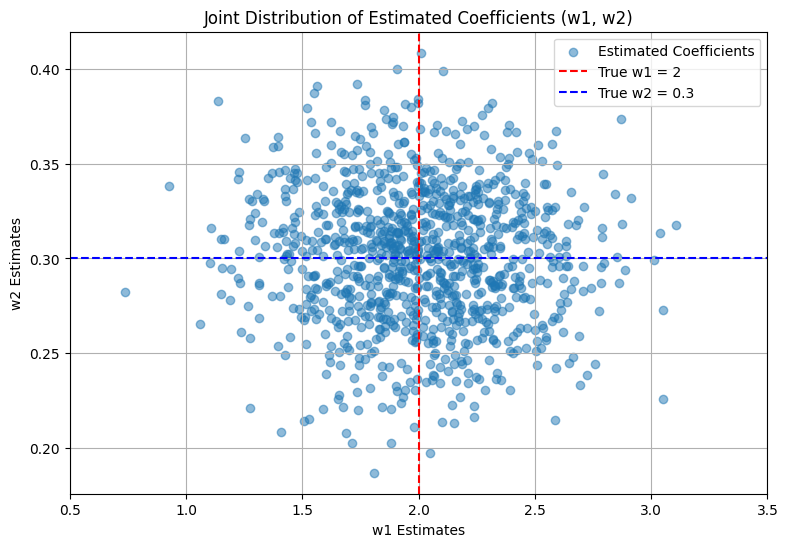

In [41]:
# Plot the joint distribution of w1 and w2
plt.figure(figsize=(9, 6))
plt.scatter(w1_estimates, w2_estimates, alpha=0.5, label="Estimated Coefficients")
plt.axvline(2, color='red', linestyle='--', label="True w1 = 2")
plt.axhline(0.3, color='blue', linestyle='--', label="True w2 = 0.3")
plt.xlim(0.5, 3.5)
plt.xlabel("w1 Estimates")
plt.ylabel("w2 Estimates")
plt.title("Joint Distribution of Estimated Coefficients (w1, w2)")
plt.legend()
plt.grid()
plt.show()

In [26]:
# Calculate 95% confidence intervals
w1_ci = np.percentile(w1_estimates, [2.5, 97.5])
w2_ci = np.percentile(w2_estimates, [2.5, 97.5])

print("95% Confidence Interval for w1:", w1_ci)
print("95% Confidence Interval for w2:", w2_ci)

95% Confidence Interval for w1: [1.29810245 2.67970486]
95% Confidence Interval for w2: [0.22690283 0.36819846]


In [42]:
from scipy.stats import t

# Degrees of freedom
df = n - 2 - 1  # n - number of predictors - 1

# Variance of residuals (assume residual variance is 1 for simplicity)
residual_variance = 1

# Variance-covariance matrix of coefficients
X_with_intercept = np.column_stack((np.ones(n), X))
XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
coef_variance = residual_variance * np.diag(XtX_inv)

# Standard errors of coefficients
se_w1 = np.sqrt(coef_variance[1])
se_w2 = np.sqrt(coef_variance[2])

# t-statistics
t_w1 = w1_estimates / se_w1
t_w2 = w2_estimates / se_w2

# p-values
p_w1 = 2 * (1 - t.cdf(np.abs(t_w1), df))
p_w2 = 2 * (1 - t.cdf(np.abs(t_w2), df))

# Proportion of rejections
reject_w1 = np.mean(p_w1 < 0.05)
reject_w2 = np.mean(p_w2 < 0.05)

print(f"Proportion of datasets rejecting H0: w1 = 0: {reject_w1}")
print(f"Proportion of datasets rejecting H0: w2 = 0: {reject_w2}")

Proportion of datasets rejecting H0: w1 = 0: 1.0
Proportion of datasets rejecting H0: w2 = 0: 1.0


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameters
n = 100  # Number of samples

# Case (i): Violate full rank assumption
np.random.seed(140)
X1 = np.random.uniform(0, 1, n)
X2 = 2 * X1
E = np.random.normal(0, 1, n)
Y = 2 * X1 + 0.3 * X2 + E

# Prepare the data
X = np.column_stack((X1, X2))
model = LinearRegression()
try:
    model.fit(X, Y)
    print("Coefficient estimates (Full Rank Violation):", model.coef_)
except np.linalg.LinAlgError as e:
    print("Error due to full rank violation:", e)

# Case (ii): Violate homoskedasticity assumption
np.random.seed(140)
X1 = np.random.uniform(0, 1, n)
X2 = 0.5 * X1 + 10 * np.random.uniform(0, 1, n)
E = np.random.normal(0, 1 + 0.5 * X2, n)
Y = 2 * X1 + 0.3 * X2 + E

# Prepare the data
X = np.column_stack((X1, X2))
model = LinearRegression()
model.fit(X, Y)
print("Coefficient estimates (Homoskedasticity Violation):", model.coef_)

Coefficient estimates (Full Rank Violation): [0.57431226 1.14862452]
Coefficient estimates (Homoskedasticity Violation): [3.08139417 0.21467792]
